# WATER QUALITY PREDICTION

# TEAM MEMBERS
### A SURAJ REDDY- AM.EN.U4CSE20012
###  ASK VISWAS - AM.EN.U4CSE20013
###  N SAI SANDEEP - AM.EN.U4CSE20049
### P LAXMI PRANEETH - AM.EN.U4CSE20052
### CGS PRANAV ADVIATH -AM.EN.U4CSE20056


# PROBLEM STATEMENT
Here and there we see people dying due to intaking impure water which is a misfortune. Water in some areas it might be good or bad based on impurity present in it. So we want to classify whether water is safe for comsumption or not basing on level of impurity.
For a large set of data and preprocessed data and made visualisation for easy understanding of data then we put those data in different machine learning classification models and finding out the best model to predict the category of customers.


# IMPORT LIBRARIES

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Importing Data

In [2]:

data=read_csv("1.csv")
data


aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20  ...  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65  ...  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05  ...  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71  ...  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13  ...  0.117      6.74      1.11    0.003   
...      ...       ...       ...  ...    ...       ...       ...      ...   
7994    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
7995    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
7996    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
7997    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
7998    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           37.75    6.78      0.08    0.34     0.02        1  
1           32.26    3.21      0.08    0.27     0.05        1  
2           50.28    7.07      0.07    0.44     0.01        0  
3            9.12    1.72      0.02    0.45     0.05        1  
4           16.90    2.41      0.02    0.06     0.02        1  
...           ...     ...       ...     ...      ...      ...  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[7999 rows x 21 columns]

In [3]:
colnames=['aluminium','ammonia','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','bacteria',
          'viruses','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium','is_safe']
print(data.shape)

(7999, 21)


In [4]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

# Converting Attributes to float and Removing NAN Values.


In [5]:
indexNames=data[data['ammonia']=='#NUM!'].index
print(indexNames)
data.drop(indexNames,inplace=True)
v1=lambda x:float(x)
data.ammonia=data.ammonia.apply(v1)
indexNames=data[data['is_safe']=='#NUM!'].index
data.drop(indexNames,inplace=True)
data.is_safe=data.is_safe.apply(v1)
data.dtypes


Int64Index([7551, 7568, 7890], dtype='int64')


aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object

# statistical summary

In [6]:
description = data.describe()
print(description)

         aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497  ...   
min       0.00000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

# Feature Selection With Univariate Selection


In [8]:
data.corr()

aluminium   ammonia   arsenic    barium   cadmium  chloramine  \
aluminium     1.000000  0.067369  0.225725  0.294091 -0.099902    0.369221   
ammonia       0.067369  1.000000  0.046783  0.070099 -0.006422    0.104775   
arsenic       0.225725  0.046783  1.000000  0.362925  0.334782    0.356509   
barium        0.294091  0.070099  0.362925  1.000000 -0.037901    0.446869   
cadmium      -0.099902 -0.006422  0.334782 -0.037901  1.000000   -0.144366   
chloramine    0.369221  0.104775  0.356509  0.446869 -0.144366    1.000000   
chromium      0.353134  0.124782  0.312421  0.415937 -0.157716    0.555846   
copper        0.168569  0.015953 -0.036488  0.065277 -0.109252    0.118975   
flouride     -0.009877 -0.028221  0.003731 -0.018637  0.005005    0.004254   
bacteria     -0.078324  0.063603  0.035642  0.101304 -0.092133    0.154443   
viruses      -0.071040  0.105856  0.011596 -0.002429  0.021255    0.003432   
lead          0.020957 -0.037065 -0.087669 -0.042829 -0.035313   -0.030241   
nitrates     -0.003851  0.006483  0.027533 -0.011423  0.020232   -0.001619   
nitrites      0.237439 -0.063309  0.305113  0.312783 -0.015829    0.379916   
mercury      -0.003129  0.020884 -0.015288  0.006165 -0.016169   -0.021198   
perchlorate   0.362986  0.090928  0.332228  0.462207 -0.149269    0.588683   
radium        0.243396  0.050401  0.218328  0.286890 -0.098936    0.389119   
selenium     -0.003651  0.029897 -0.006993  0.035222  0.009933    0.011435   
silver        0.334923  0.075547  0.307794  0.431542 -0.155441    0.522372   
uranium       0.014723  0.014635  0.001469 -0.002541 -0.005911   -0.007648   
is_safe       0.333974 -0.022919 -0.123362  0.090858 -0.256034    0.186704   

             chromium    copper  flouride  bacteria  ...      lead  nitrates  \
aluminium    0.353134  0.168569 -0.009877 -0.078324  ...  0.020957 -0.003851   
ammonia      0.124782  0.015953 -0.028221  0.063603  ... -0.037065  0.006483   
arsenic      0.312421 -0.036488  0.003731  0.035642  ... -0.087669  0.027533   
barium       0.415937  0.065277 -0.018637  0.101304  ... -0.042829 -0.011423   
cadmium     -0.157716 -0.109252  0.005005 -0.092133  ... -0.035313  0.020232   
chloramine   0.555846  0.118975  0.004254  0.154443  ... -0.030241 -0.001619   
chromium     1.000000  0.113003 -0.002424  0.141937  ... -0.050254 -0.012843   
copper       0.113003  1.000000  0.011647  0.149271  ...  0.121762  0.002259   
flouride    -0.002424  0.011647  1.000000  0.013984  ...  0.012146 -0.008245   
bacteria     0.141937  0.149271  0.013984  1.000000  ... -0.027179 -0.033993   
viruses      0.002193  0.006183  0.018261  0.618535  ...  0.017886 -0.044621   
lead        -0.050254  0.121762  0.012146 -0.027179  ...  1.000000  0.035095   
nitrates    -0.012843  0.002259 -0.008245 -0.033993  ...  0.035095  1.000000   
nitrites     0.335940  0.162092 -0.016591  0.246463  ... -0.052656  0.016898   
mercury     -0.022541  0.017785 -0.004263 -0.004406  ... -0.008073 -0.020429   
perchlorate  0.524432  0.104527 -0.016352  0.147526  ... -0.027426 -0.014091   
radium       0.315484  0.026534  0.007683  0.099080  ... -0.048623 -0.021406   
selenium     0.030598 -0.003356  0.022726 -0.006779  ...  0.031694  0.043180   
silver       0.510705  0.089241  0.014446  0.148199  ... -0.057207  0.005149   
uranium     -0.005472  0.006802  0.016849  0.045077  ... -0.009372  0.000795   
is_safe      0.182306  0.029498  0.006550 -0.022077  ... -0.009970 -0.072100   

             nitrites   mercury  perchlorate    radium  selenium    silver  \
aluminium    0.237439 -0.003129     0.362986  0.243396 -0.003651  0.334923   
ammonia     -0.063309  0.020884     0.090928  0.050401  0.029897  0.075547   
arsenic      0.305113 -0.015288     0.332228  0.218328 -0.006993  0.307794   
barium       0.312783  0.006165     0.462207  0.286890  0.035222  0.431542   
cadmium     -0.015829 -0.016169    -0.149269 -0.098936  0.009933 -0.155441   
chloramine   0.379916 -0.021198     0.588683  0.389119  0.011435  0

In [9]:
data.drop(["ammonia"], axis = 1, inplace = True)
data.describe()


aluminium      arsenic       barium      cadmium   chloramine  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396     0.161477     1.567928     0.042803     2.177589   
std       1.265323     0.252632     1.216227     0.036049     2.567210   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040000     0.030000     0.560000     0.008000     0.100000   
50%       0.070000     0.050000     1.190000     0.040000     0.530000   
75%       0.280000     0.100000     2.482500     0.070000     4.240000   
max       5.050000     1.050000     4.940000     0.130000     8.680000   

          chromium       copper     flouride     bacteria      viruses  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.247300     0.805940     0.771646     0.319714     0.328706   
std       0.270663     0.653595     0.435423     0.329497     0.378113   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.050000     0.090000     0.407500     0.000000     0.002000   
50%       0.090000     0.750000     0.770000     0.220000     0.008000   
75%       0.440000     1.390000     1.160000     0.610000     0.700000   
max       0.900000     2.000000     1.500000     1.000000     1.000000   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.099431     9.819250     1.329846     0.005193    16.465266   
std       0.058169     5.541977     0.573271     0.002967    17.688827   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048000     5.000000     1.000000     0.003000     2.170000   
50%       0.102000     9.930000     1.420000     0.005000     7.745000   
75%       0.151000    14.610000     1.760000     0.008000    29.487500   
max       0.200000    19.830000     2.930000     0.010000    60.010000   

            radium     selenium       silver      uranium      is_safe  
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  
mean      2.920106     0.049684     0.147811     0.044672     0.114057  
std       2.322805     0.028773     0.143569     0.026906     0.317900  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.820000     0.020000     0.040000     0.020000     0.000000  
50%       2.410000     0.050000     0.080000     0.050000     0.000000  
75%       4.670000     0.070000     0.240000     0.070000     0.000000  
max       7.990000     0.100000     0.500000     0.090000     1.000000

In [10]:
X = data.iloc[:,0:19]
Y = data.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis =1)
featureScores.columns = ['Feature','Score']
featureScores



Feature        Score
0     aluminium  2142.465724
1       arsenic    48.089352
2        barium    62.266278
3       cadmium    15.912158
4    chloramine   843.478997
5      chromium    78.714917
6        copper     3.687476
7      flouride     0.084283
8      bacteria     1.323293
9       viruses    32.745693
10         lead     0.027041
11     nitrates   130.000691
12     nitrites     4.361898
13      mercury     0.018374
14  perchlorate   871.457594
15       radium    61.920504
16     selenium     0.127396
17       silver    11.784861
18      uranium     0.740864

In [11]:
print(featureScores.nlargest(10,'Score'))
data.drop(['copper','flouride','bacteria','lead','nitrates','mercury','selenium','silver'
,'uranium'], axis = 1, inplace = True)


        Feature        Score
0     aluminium  2142.465724
14  perchlorate   871.457594
4    chloramine   843.478997
11     nitrates   130.000691
5      chromium    78.714917
2        barium    62.266278
15       radium    61.920504
1       arsenic    48.089352
9       viruses    32.745693
3       cadmium    15.912158


# Summarizing the Dataset

In [12]:
print(data.shape)
print(data.groupby('is_safe').size())
print(data.describe())

(7996, 11)
is_safe
0.0    7084
1.0     912
dtype: int64
         aluminium      arsenic       barium      cadmium   chloramine  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396     0.161477     1.567928     0.042803     2.177589   
std       1.265323     0.252632     1.216227     0.036049     2.567210   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040000     0.030000     0.560000     0.008000     0.100000   
50%       0.070000     0.050000     1.190000     0.040000     0.530000   
75%       0.280000     0.100000     2.482500     0.070000     4.240000   
max       5.050000     1.050000     4.940000     0.130000     8.680000   

          chromium      viruses     nitrites  perchlorate       radium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.247300     0.328706     1.329846    16.465266     2.920106   
std       0.270663     0.378113     0.573271    17.6888

In [13]:
data.corr()


aluminium   arsenic    barium   cadmium  chloramine  chromium  \
aluminium     1.000000  0.225725  0.294091 -0.099902    0.369221  0.353134   
arsenic       0.225725  1.000000  0.362925  0.334782    0.356509  0.312421   
barium        0.294091  0.362925  1.000000 -0.037901    0.446869  0.415937   
cadmium      -0.099902  0.334782 -0.037901  1.000000   -0.144366 -0.157716   
chloramine    0.369221  0.356509  0.446869 -0.144366    1.000000  0.555846   
chromium      0.353134  0.312421  0.415937 -0.157716    0.555846  1.000000   
viruses      -0.071040  0.011596 -0.002429  0.021255    0.003432  0.002193   
nitrites      0.237439  0.305113  0.312783 -0.015829    0.379916  0.335940   
perchlorate   0.362986  0.332228  0.462207 -0.149269    0.588683  0.524432   
radium        0.243396  0.218328  0.286890 -0.098936    0.389119  0.315484   
is_safe       0.333974 -0.123362  0.090858 -0.256034    0.186704  0.182306   

              viruses  nitrites  perchlorate    radium   is_safe  
aluminium   -0.071040  0.237439     0.362986  0.243396  0.333974  
arsenic      0.011596  0.305113     0.332228  0.218328 -0.123362  
barium      -0.002429  0.312783     0.462207  0.286890  0.090858  
cadmium      0.021255 -0.015829    -0.149269 -0.098936 -0.256034  
chloramine   0.003432  0.379916     0.588683  0.389119  0.186704  
chromium     0.002193  0.335940     0.524432  0.315484  0.182306  
viruses      1.000000 -0.091364     0.002965 -0.019955 -0.097040  
nitrites    -0.091364  1.000000     0.346407  0.272939  0.046986  
perchlorate  0.002965  0.346407     1.000000  0.373242  0.075735  
radium      -0.019955  0.272939     0.373242  1.000000  0.064743  
is_safe     -0.097040  0.046986     0.075735  0.064743  1.000000

# Normalizing Dataset

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as min
import numpy as n
import pandas as p
arr=n.array(data)
dataframe=p.DataFrame(arr)
dataframe=p.DataFrame(arr[:,2:32])
f1=dataframe.values.astype(float)
minmaxscaler=min()
xscaled=minmaxscaler.fit_transform(f1)
dfnormalized=p.DataFrame(xscaled)
print(dfnormalized)

NameError: name 'data' is not defined

# Standardizing Dataset

In [5]:
from sklearn.preprocessing import StandardScaler
arr=data.values
X=arr[:,2:32]
Y=arr[:,8]
scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)
print(rescaledX[0:2,:])
print(X[0:2,:])

NameError: name 'data' is not defined

# Data Visualization


<AxesSubplot:>

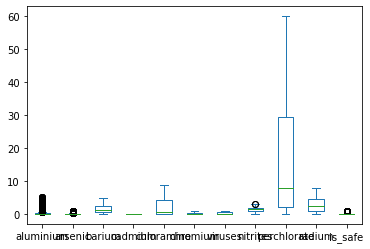

In [14]:
data.plot.box()


In [15]:
scaler = StandardScaler()
scaler.fit(data.drop('is_safe',axis=1))
scaled_feature = scaler.transform(data.drop('is_safe',axis=1))
df_feat = pd.DataFrame(scaled_feature,columns = data.columns[:-1])
df_feat.head()


aluminium   arsenic    barium   cadmium  chloramine  chromium   viruses  \
0   0.777403 -0.480875  1.054205 -0.993241   -0.711941  2.152993 -0.869387   
1   1.306945 -0.599632  1.432447 -1.131948    1.208552  1.598765  0.849782   
2   0.271572 -0.480875 -0.812340 -0.965499    0.803417  1.044536 -0.861452   
3   0.548198 -0.480875  1.144654 -1.159690    1.968179 -0.802892  1.008475   
4   0.200439 -0.520460 -1.124801 -1.020982    0.191820  1.635713 -0.866742   

   nitrites  perchlorate    radium  
0 -0.348629     1.203362  1.661842  
1  1.046960     0.892977  0.124811  
2 -0.383518     1.911763  1.786699  
3 -0.069511    -0.415275 -0.516695  
4 -0.383518     0.024578 -0.219622

# Pair plot


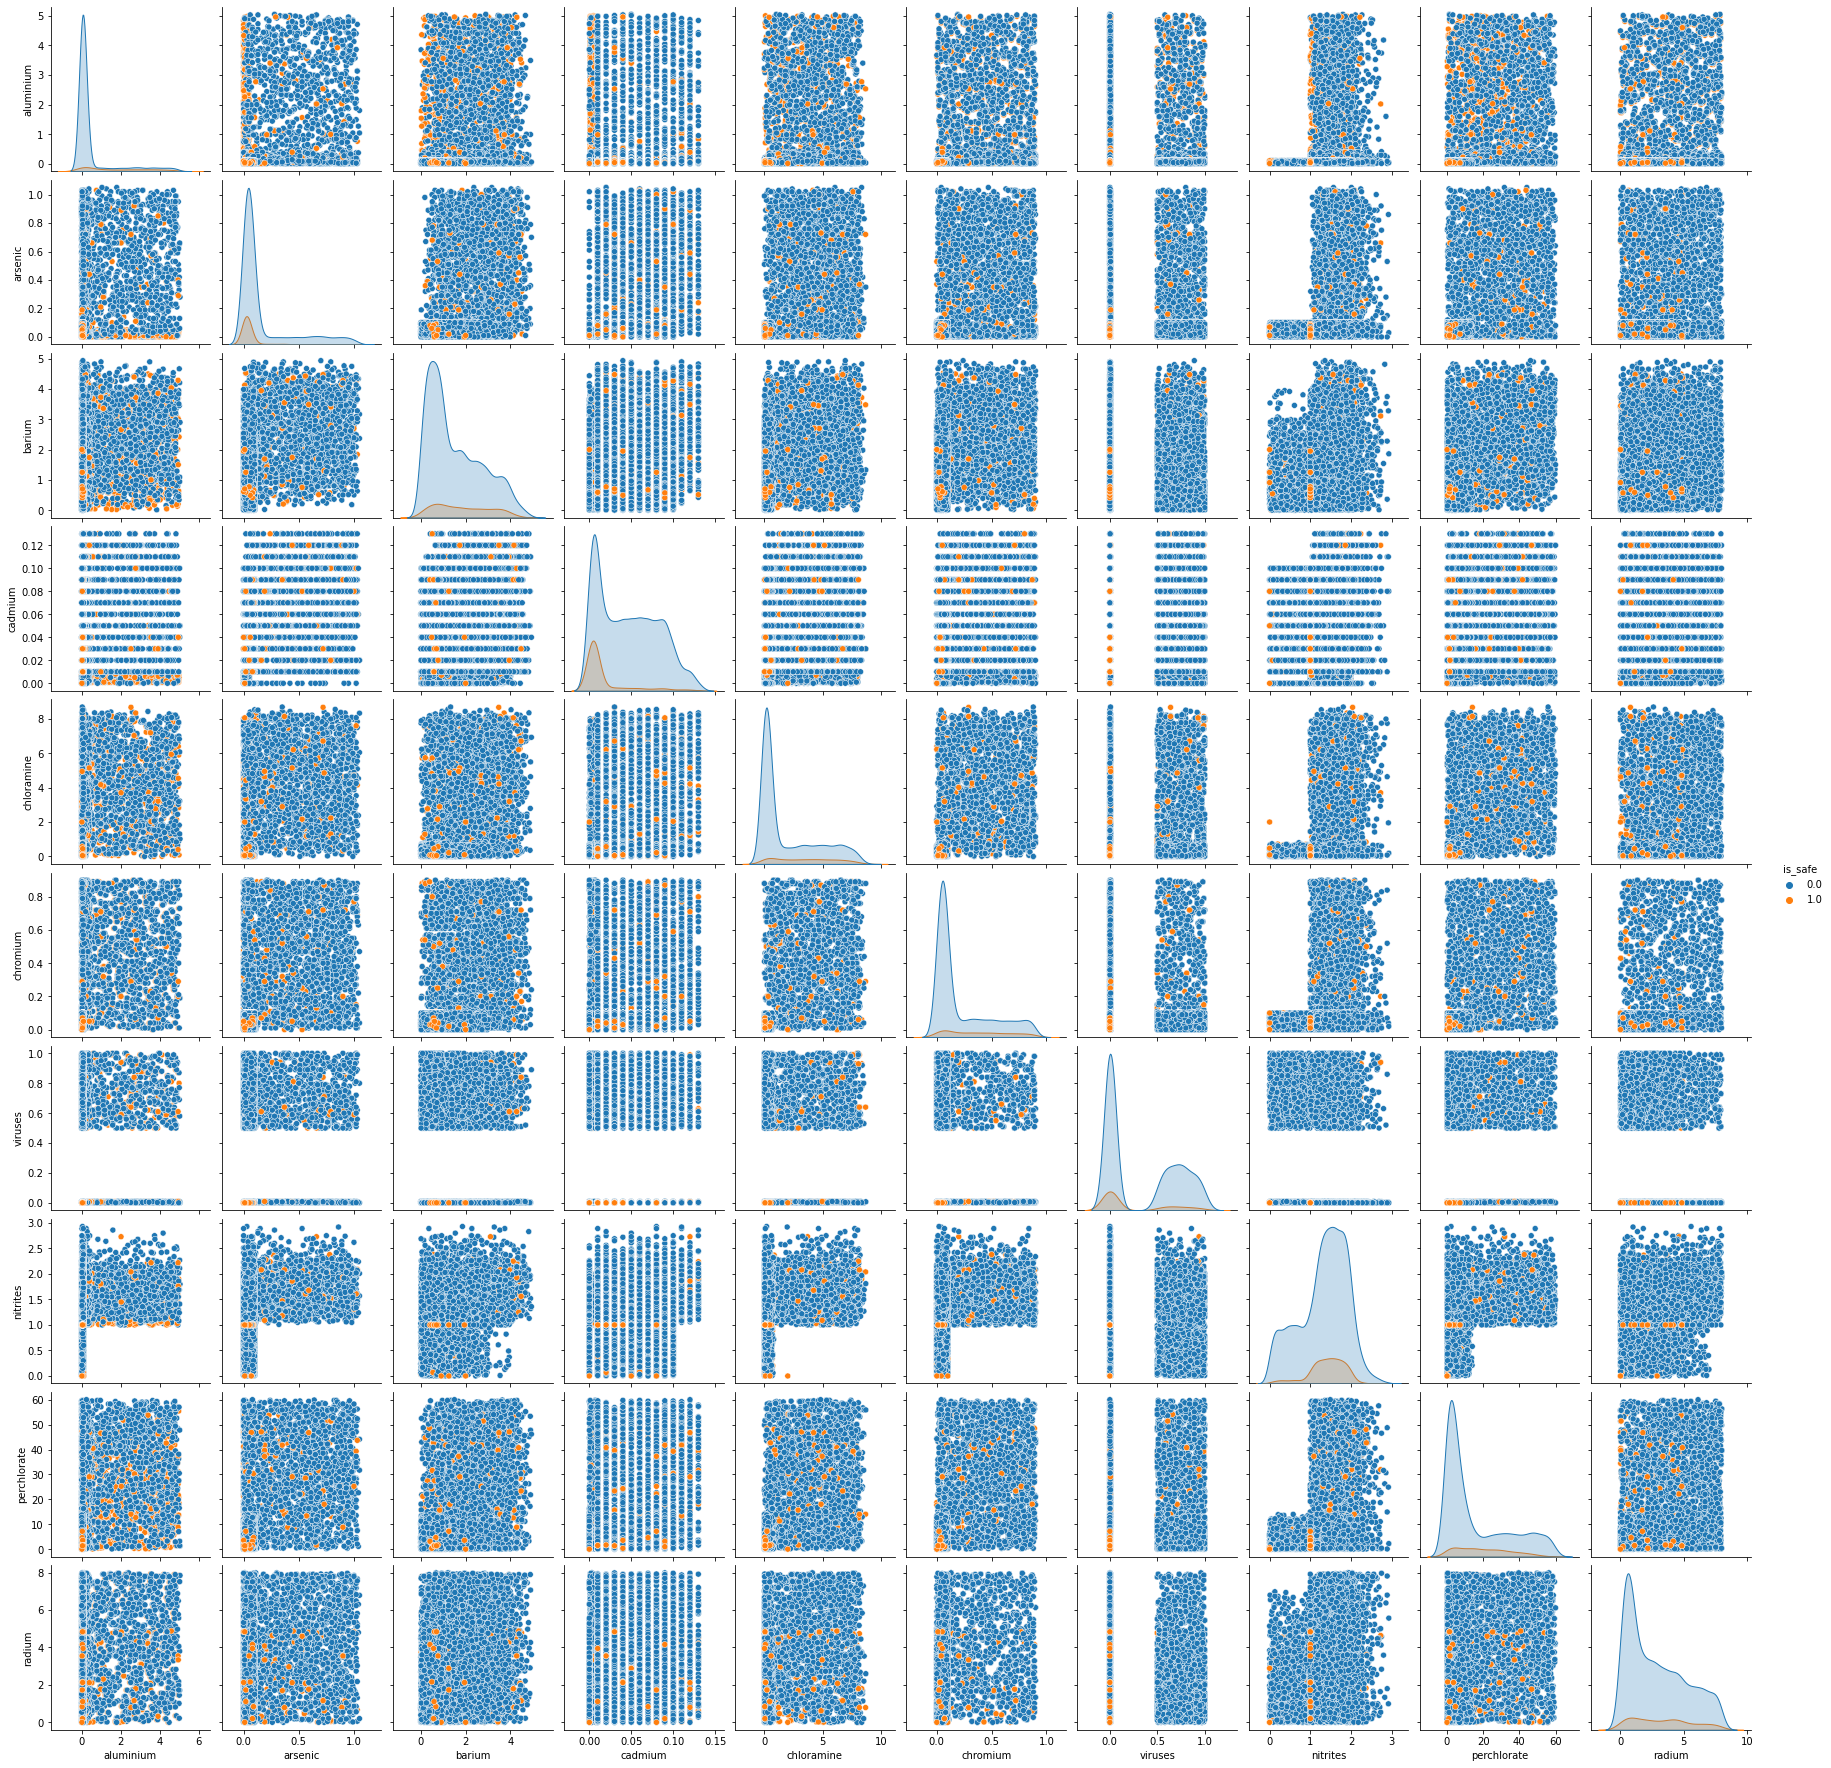

In [16]:
import seaborn as sns
sns.pairplot(data,hue='is_safe')

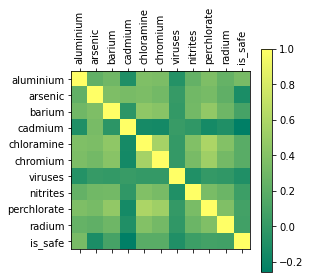

In [17]:
import matplotlib.pyplot as plt
plt.matshow(data.corr(),cmap='summer')
plt.colorbar()
plt.xticks(list(range(len(data.columns))),data.columns,rotation='vertical')
plt.yticks(list(range(len(data.columns))),data.columns,rotation='horizontal')
plt.show()

# DATA SUMMARIZATION USING GRAPHS


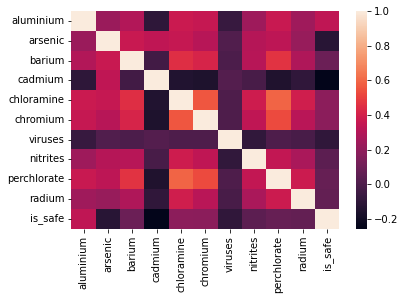

In [18]:
correlations =data.corr()
import seaborn as sns
sns.heatmap(correlations)
plt.show()


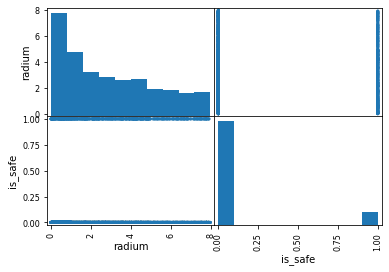

In [19]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
scatter_matrix(data[['radium','is_safe']])
plt.show()

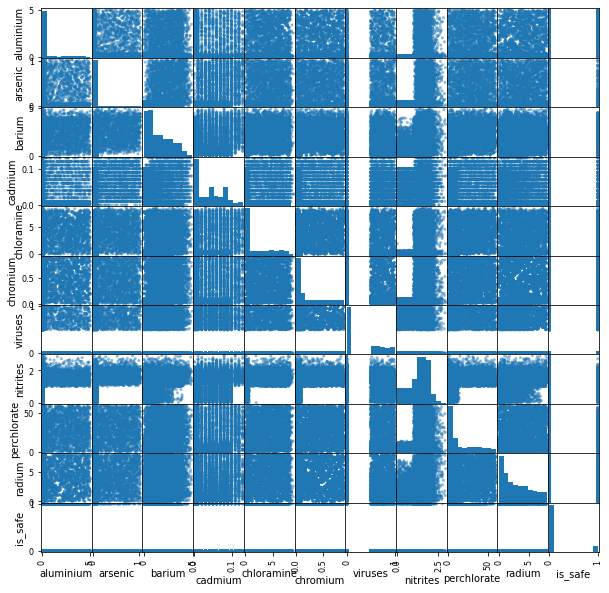

In [20]:
scatter_matrix(data,figsize=(10,10))
plt.show()

# With Above matrix we can see Aluminium having the highest correlation with the Target Variable
# Count plot for Dependent Feature

<AxesSubplot:xlabel='aluminium', ylabel='is_safe'>

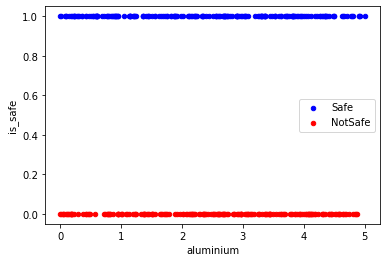

In [21]:
not_safe = data[data['is_safe']==0][0:200]
safe = data[data['is_safe']==1][0:200]
axes = safe.plot(kind ='scatter', x = 'aluminium', y ='is_safe', color= 'blue', label= 'Safe')
not_safe.plot(kind ='scatter', x = 'aluminium', y ='is_safe', color= 'red', label= 'NotSafe', ax = axes)
# Count plot for Dependent Feature

<AxesSubplot:xlabel='is_safe', ylabel='count'>

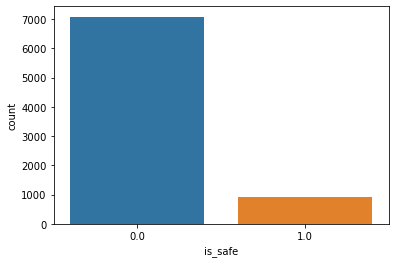

In [22]:
sns.countplot(x='is_safe', data= data)

# Checking For Outliers

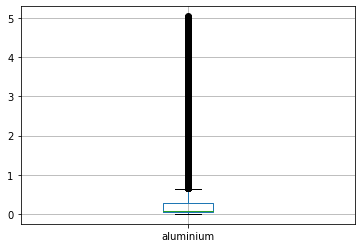

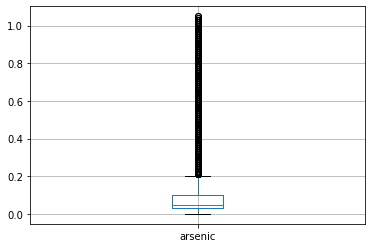

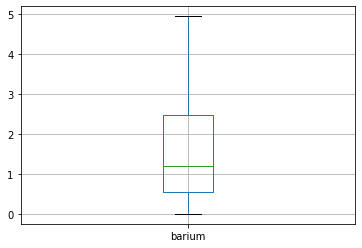

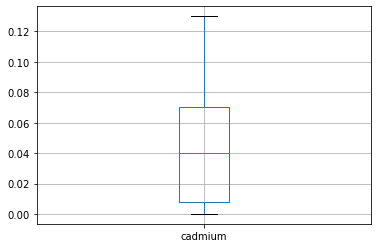

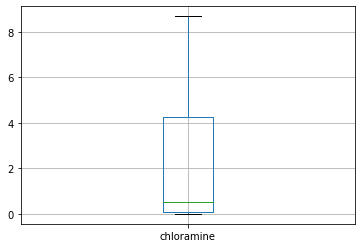

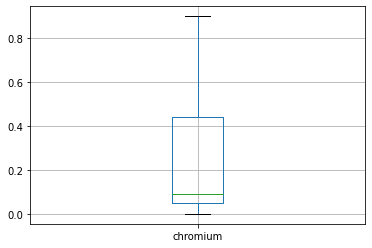

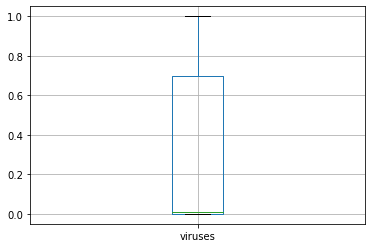

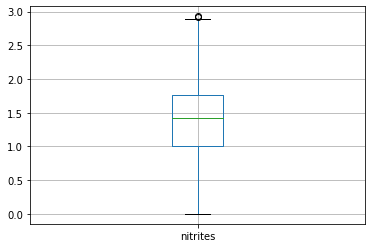

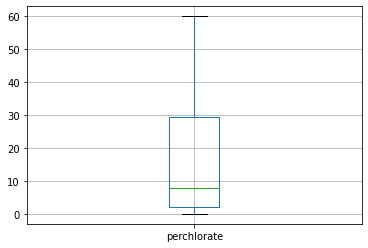

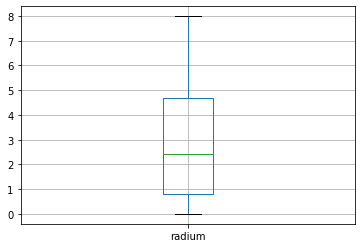

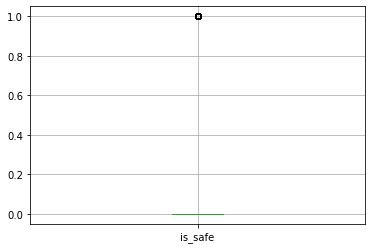

In [23]:
for column in data.columns:
    plt.figure()
    data.boxplot([column])

# Checking theCovariance between each attribute. Covariance indicates the relationship of two variables whenever one
# variable changes.

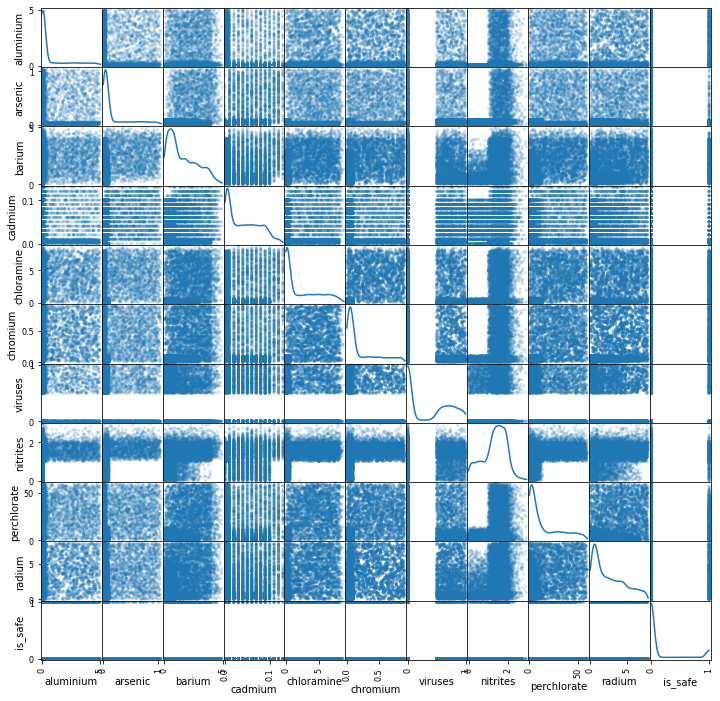

In [24]:
pd.plotting.scatter_matrix(data, alpha =0.2 , figsize=(12,12), diagonal = 'kde')
plt.show()

# Data preprocessing

In [25]:
#First quartile
data.quantile(0.25)

aluminium      0.040
arsenic        0.030
barium         0.560
cadmium        0.008
chloramine     0.100
chromium       0.050
viruses        0.002
nitrites       1.000
perchlorate    2.170
radium         0.820
is_safe        0.000
Name: 0.25, dtype: float64

In [26]:
#Second Quartile / Median
data.quantile(0.5)

aluminium      0.070
arsenic        0.050
barium         1.190
cadmium        0.040
chloramine     0.530
chromium       0.090
viruses        0.008
nitrites       1.420
perchlorate    7.745
radium         2.410
is_safe        0.000
Name: 0.5, dtype: float64

In [27]:
#Third Quartile
data.quantile(0.75)

aluminium       0.2800
arsenic         0.1000
barium          2.4825
cadmium         0.0700
chloramine      4.2400
chromium        0.4400
viruses         0.7000
nitrites        1.7600
perchlorate    29.4875
radium          4.6700
is_safe         0.0000
Name: 0.75, dtype: float64

In [28]:
# Interquartile range
data.quantile(0.75) - data.quantile(0.25)

aluminium       0.2400
arsenic         0.0700
barium          1.9225
cadmium         0.0620
chloramine      4.1400
chromium        0.3900
viruses         0.6980
nitrites        0.7600
perchlorate    27.3175
radium          3.8500
is_safe         0.0000
dtype: float64

In [29]:
data = data.fillna(data.mean())

# Testing Out Accuracy Using Logistic regression
# Splitting The DataSet to Training ans Test

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
X = data.iloc[:,0:9]
y = data.iloc[:,-1]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


# LogisticRegression: 

In [31]:
from sklearn.linear_model import LogisticRegression
logReg_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
logReg_classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Testing accuracy

accuracy is:-  0.90125
confusion matrix is:- 
 [[1401   20]
 [ 138   41]]
percentage of confusion matrix is:- 
 [[0.9859254  0.0140746 ]
 [0.77094972 0.22905028]]


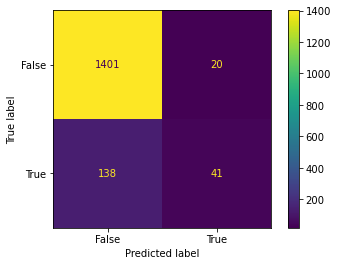

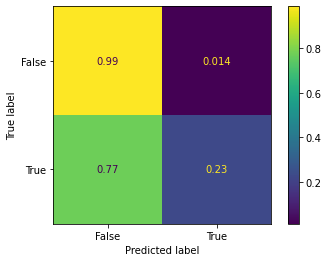

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Making prediction using the model
y_pred = logReg_classifier.predict(X_test)
# Evaluating The Model Checking the Accuracy and Performence Using Confusion Matrix
print('accuracy is:- ',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is:- \n',cm)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
print('percentage of confusion matrix is:- \n',cm_norm)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)[:, np.newaxis]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Training accuracy

accuracy is:-  0.9019699812382739
confusion matrix is:- 
 [[5563  100]
 [ 527  206]]
percentage of confusion matrix is:- 
 [[0.98234152 0.01765848]
 [0.71896317 0.28103683]]


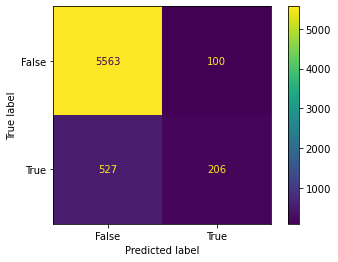

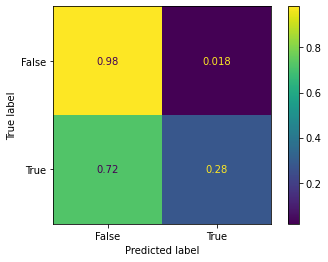

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Making prediction using the model
y_pred1 = logReg_classifier.predict(X_train)
# Evaluating The Model Checking the Accuracy and Performence Using Confusion Matrix
print('accuracy is:- ',accuracy_score(y_train,y_pred1))
cm = confusion_matrix(y_train, y_pred1)
print('confusion matrix is:- \n',cm)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
print('percentage of confusion matrix is:- \n',cm_norm)
confusion_matrix = metrics.confusion_matrix(y_train, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)[:, np.newaxis]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# SVM using scikit-learn


In [34]:
data['is_safe'].value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

<AxesSubplot:xlabel='aluminium', ylabel='perchlorate'>

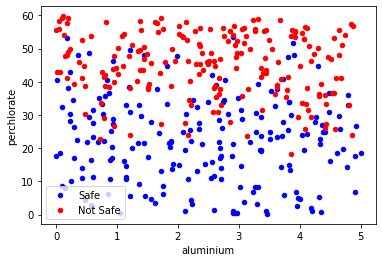

In [35]:
not_safe = data[data['is_safe']==0][0:200]
safe = data[data['is_safe']==1][0:200]
axes = safe.plot(kind ='scatter', x = 'aluminium', y ='perchlorate', color= 'blue', label= 'Safe')
not_safe.plot(kind ='scatter', x = 'aluminium', y ='perchlorate', color= 'red', label= 'Not Safe', ax = axes)


# Splitting dataset into train and test


In [36]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X = data.iloc[:,0:9]
y = data.iloc[:,-1]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C=2)
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [37]:
y_predict = classifier.predict(X_test)
# Evaluating The results
accuracy_score(y_test,y_predict)


0.90375

# Testing accuracy

[[1401   20]
 [ 134   45]]


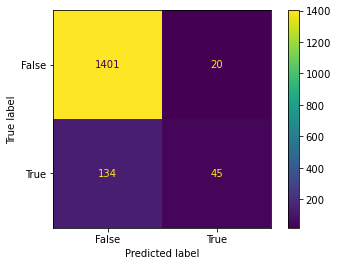

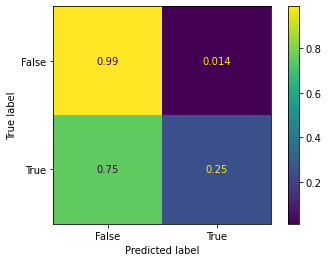

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1421
         1.0       0.69      0.25      0.37       179

    accuracy                           0.90      1600
   macro avg       0.80      0.62      0.66      1600
weighted avg       0.89      0.90      0.88      1600



In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print(confusion_matrix(y_test,y_predict))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)[:, np.newaxis]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test, y_predict))


# Training accuracy

[[1401   20]
 [ 134   45]]


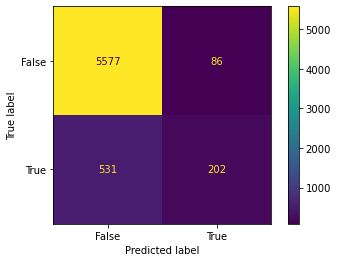

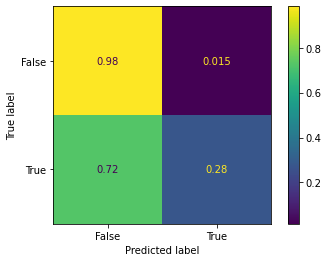

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      5663
         1.0       0.70      0.28      0.40       733

    accuracy                           0.90      6396
   macro avg       0.81      0.63      0.67      6396
weighted avg       0.89      0.90      0.88      6396



0.9035334584115072

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print(confusion_matrix(y_test,y_predict))
y_predict1 = classifier.predict(X_train)
confusion_matrix = metrics.confusion_matrix(y_train, y_predict1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)[:, np.newaxis]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_train, y_predict1))
accuracy_score(y_train, y_predict1)

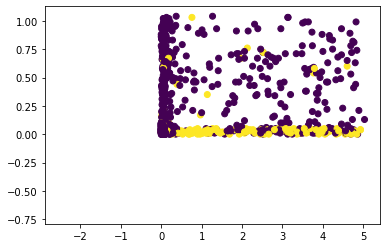

In [40]:
plt.scatter(X_test.iloc[:,0] , X_test.iloc[:,1],c=y_test)
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5,-2.5)
yy = a* xx - (classifier.intercept_[0] / w[1])
plt.plot(xx,yy)
plt.axis("on"), plt.show();


# Using Radial basis function kernel
# The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as:

In [41]:
classifier_rbf = svm.SVC(kernel = 'rbf', gamma = 'auto', C=10)
classifier_rbf.fit(X_train, y_train)
y_predict = classifier_rbf.predict(X_test)
accuracy_score(y_test,y_predict)

0.92

# Decision Trees


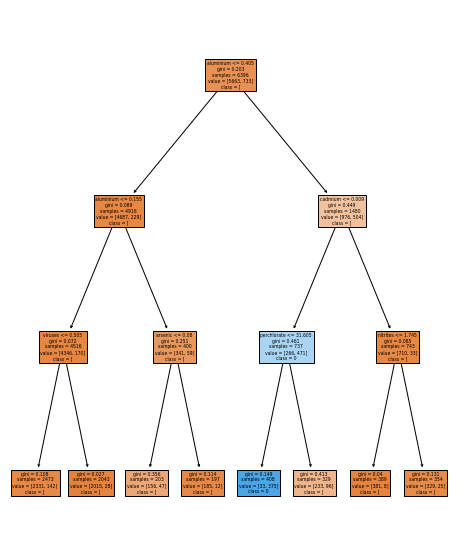

Accuracy is  93.875


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
feature_names=data.columns
labels = y_train.unique()
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

fig = plt.figure(figsize=(8,10))
_ = tree.plot_tree(clf_gini, feature_names=feature_names,class_names=str(labels),filled=True)
plt.show()
y_pred=clf_gini.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)


# Random forest Algorithm 

# Splitting the DataSet

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = data.iloc[:,0:9]
y = data.iloc[:,-1]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)
prediction_test = rf_classifier.predict(X=X_test)
#Accuracy on Training Data
print("Training Accuracy is: ", rf_classifier.score(X_train, y_train))

Training Accuracy is:  1.0


# Accuracy on Testing data

Testing Accuracy is:  0.943125


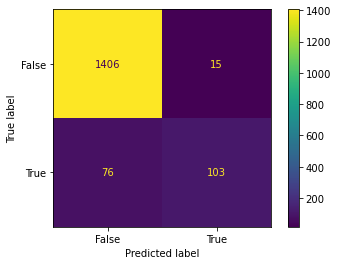

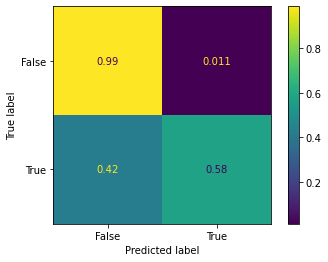

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Testing Accuracy is: ", rf_classifier.score(X_test, y_test))
# Plotting the confusion matrix
cm=confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)[:, np.newaxis]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [46]:
from itertools import product
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import mlxtend
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators,criterion='entropy',max_features=f,max_depth=d,
                                           n_jobs=2,random_state=1337)
    rf_classifier.fit(X_train, y_train)
    prediction_test = rf_classifier.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}:{:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)[:, np.newaxis]
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

ModuleNotFoundError: No module named 'mlxtend'